In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#to clear all the outputs
from IPython.display import clear_output

for i in range(100):
    clear_output(wait=True)
    print("Hello World!")

Hello World!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
us_state_abbrev_num = {}
counter = 1
for key, value in us_state_abbrev.items():
    us_state_abbrev_num[counter] = key
    counter +=1
data = pd.read_csv("elsec15_csv.csv", index_col=False)
us_state_abbrev_num

/Users/jpbesgen/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{1: 'Alabama',
 2: 'Alaska',
 3: 'Arizona',
 4: 'Arkansas',
 5: 'California',
 6: 'Colorado',
 7: 'Connecticut',
 8: 'Delaware',
 9: 'Florida',
 10: 'Georgia',
 11: 'Hawaii',
 12: 'Idaho',
 13: 'Illinois',
 14: 'Indiana',
 15: 'Iowa',
 16: 'Kansas',
 17: 'Kentucky',
 18: 'Louisiana',
 19: 'Maine',
 20: 'Maryland',
 21: 'Massachusetts',
 22: 'Michigan',
 23: 'Minnesota',
 24: 'Mississippi',
 25: 'Missouri',
 26: 'Montana',
 27: 'Nebraska',
 28: 'Nevada',
 29: 'New Hampshire',
 30: 'New Jersey',
 31: 'New Mexico',
 32: 'New York',
 33: 'North Carolina',
 34: 'North Dakota',
 35: 'Ohio',
 36: 'Oklahoma',
 37: 'Oregon',
 38: 'Pennsylvania',
 39: 'Rhode Island',
 40: 'South Carolina',
 41: 'South Dakota',
 42: 'Tennessee',
 43: 'Texas',
 44: 'Utah',
 45: 'Vermont',
 46: 'Virginia',
 47: 'Washington',
 48: 'West Virginia',
 49: 'Wisconsin',
 50: 'Wyoming'}

In [4]:
def change_stateNum_to_stateAbreviation(data):
    state_abr = [us_state_abbrev[state_abr_name] for state_abr_name in 
             [us_state_abbrev_num[state_int] for state_int in 
              [state for pos,state in data['STATE'].items()]]]
    data.drop(['STATE'],axis = 1)
    data['STATE'] = state_abr
    return data
def create_STATE_vs_TARGET_horizontal_bar_graph(dataset, target_col_string, upper_return_limit = 20, title = '',x_label = ''):
    fig = plt.figure(figsize=(10,5))
    sorted_data= dataset.sort_values(target_col_string,ascending = False)[:upper_return_limit]
    sorted_data_with_state_abbr = change_stateNum_to_stateAbreviation(sorted_data)
    sorted_data_with_state_abbr_plot = sns.barplot(x = target_col_string, 
                                            y = 'STATE',
                                            data = sorted_data_with_state_abbr,
                                            orient = 'h',
                                            order = sorted_data['STATE'])
    if title != '':
        sorted_data_with_state_abbr_plot.set_title(title.title())
    else:
        sorted_data_with_state_abbr_plot.set_title('Top ' + str(upper_return_limit) + " " + target_col_string)
    if x_label != '':
        sorted_data_with_state_abbr_plot.set(xlabel= x_label.title(), 
                                             ylabel="State(Abbreviation)")
    else: 
        sorted_data_with_state_abbr_plot.set(xlabel= target_col_string, 
                                             ylabel="State(Abbreviation)")

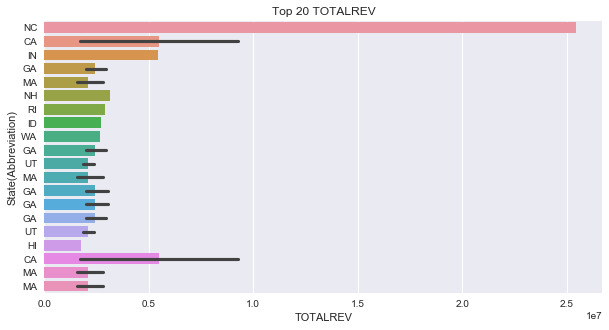

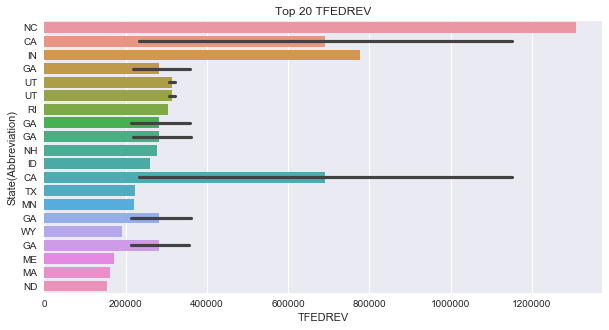

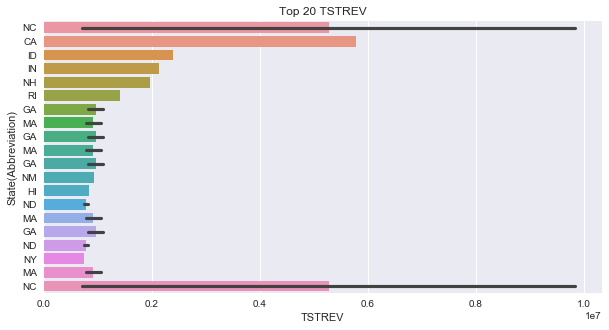

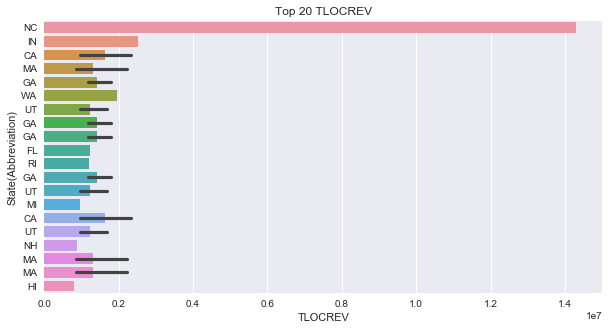

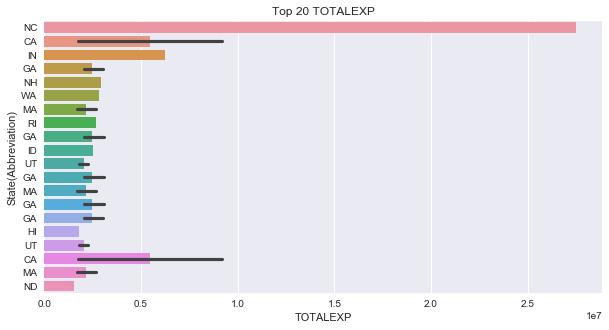

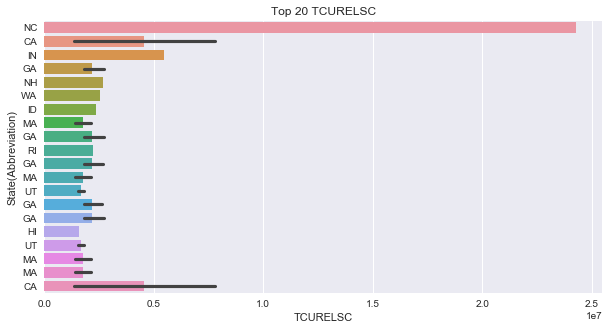

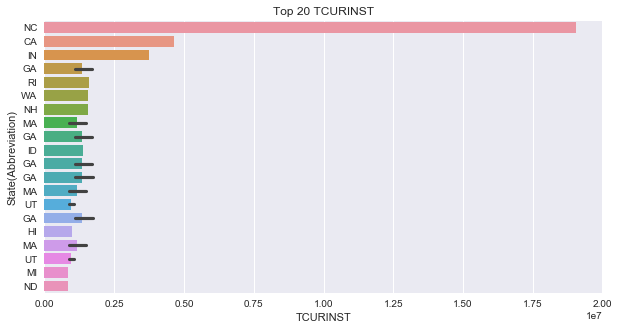

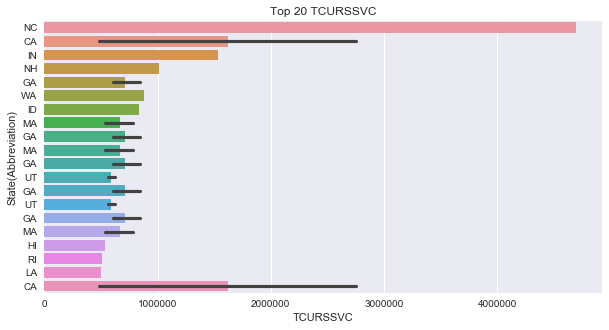

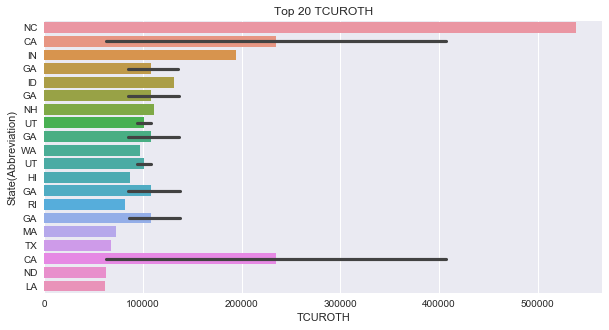

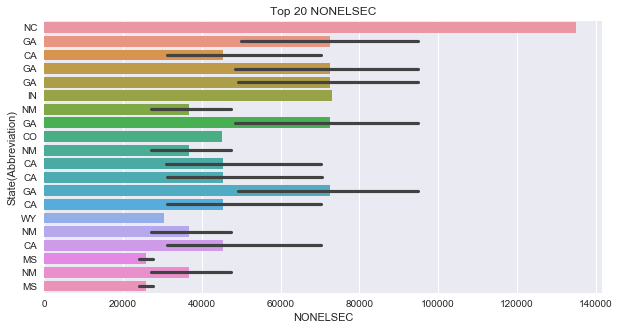

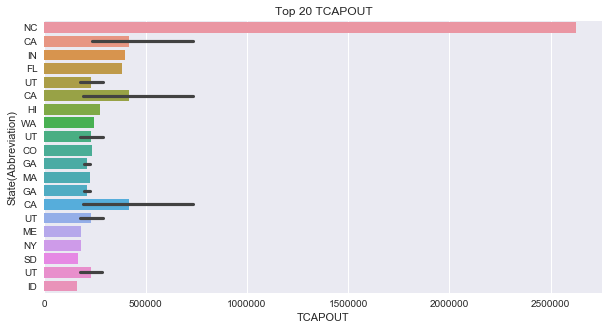

In [5]:
all_totals = ['TOTALREV','TFEDREV','TSTREV','TLOCREV','TOTALEXP','TCURELSC','TCURINST','TCURSSVC','TCUROTH','NONELSEC','TCAPOUT']
for i in all_totals:
    create_STATE_vs_TARGET_horizontal_bar_graph(data,i)

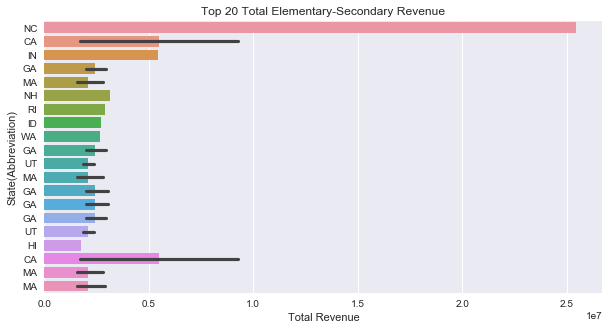

In [6]:
# Graph of Top 20 Total Elementary-Secondary Revenue
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TOTALREV',
                                            20,
                                            'Top 20 Total Elementary-Secondary Revenue'
                                            ,'Total Revenue')

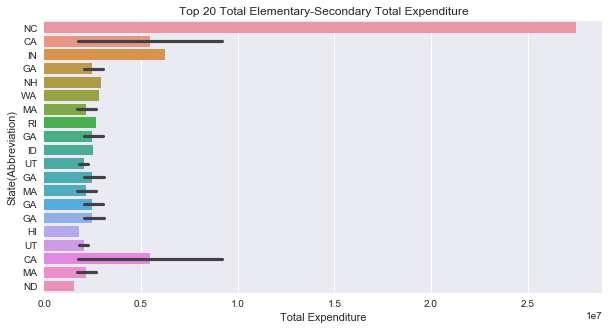

In [7]:
# Graph of Top 20 Total Elementary-Secondary Total Expenditure
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TOTALEXP',
                                            20,
                                            'Top 20 Total Elementary-Secondary Total Expenditure'
                                            ,'Total Expenditure')

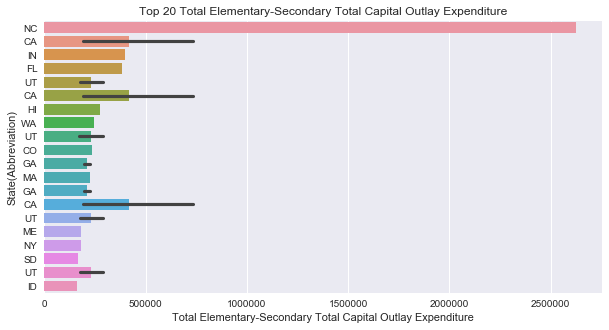

In [8]:
# Graph of Top 20 Total Elementary-Secondary Total Capital Outlay Expenditure
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TCAPOUT',
                                            20,
                                            'Top 20 Total Elementary-Secondary Total Capital Outlay Expenditure'
                                            ,'Total Elementary-Secondary Total Capital Outlay Expenditure')

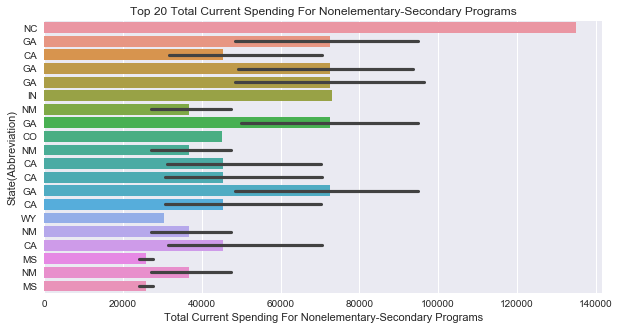

In [9]:
# Graph for Top 20 Total Current Spending For Nonelementary-Secondary Programs
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'NONELSEC',
                                            20,
                                            'Top 20 Total Current Spending For Nonelementary-Secondary Programs',
                                            'Total Current Spending For Nonelementary-Secondary Programs')

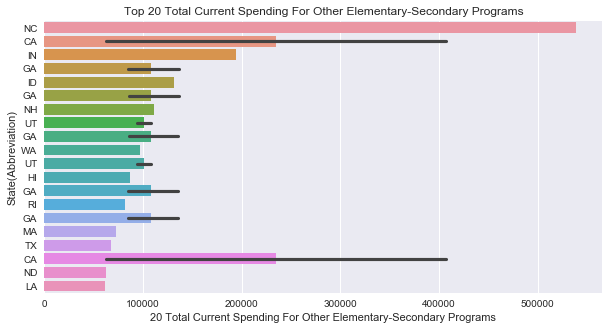

In [10]:
# Graph for Top 20 Total Current Spending For Other Elementary-Secondary Programs
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TCUROTH',
                                            20,
                                            'Top 20 Total Current Spending For Other Elementary-Secondary Programs',
                                            '20 Total Current Spending For Other Elementary-Secondary Programs')

In [11]:
data.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [12]:
data.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [20]:
data.columns.values

array(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV',
       'NCESID', 'YRDATA', 'V33', 'TOTALREV', 'TFEDREV', 'C14', 'C15',
       'C16', 'C17', 'C19', 'B11', 'C20', 'C25', 'C36', 'B10', 'B12',
       'B13', 'TSTREV', 'C01', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09',
       'C10', 'C11', 'C12', 'C13', 'C24', 'C35', 'C38', 'C39', 'TLOCREV',
       'T02', 'T06', 'T09', 'T15', 'T40', 'T99', 'D11', 'D23', 'A07',
       'A08', 'A09', 'A11', 'A13', 'A15', 'A20', 'A40', 'U11', 'U22',
       'U30', 'U50', 'U97', 'TOTALEXP', 'TCURELSC', 'TCURINST', 'E13',
       'J13', 'J12', 'J14', 'V91', 'V92', 'TCURSSVC', 'E17', 'E07', 'E08',
       'E09', 'V40', 'V45', 'V90', 'V85', 'J17', 'J07', 'J08', 'J09',
       'J40', 'J45', 'J90', 'J11', 'J96', 'TCUROTH', 'E11', 'V60', 'V65',
       'J10', 'J97', 'NONELSEC', 'V70', 'V75', 'V80', 'J98', 'TCAPOUT',
       'F12', 'G15', 'K09', 'K10', 'K11', 'J99', 'L12', 'M12', 'Q11',
       'I86', 'Z32', 'Z33', 'V11', 'V13', 'V15', 'V17', 'V21', 'V23',


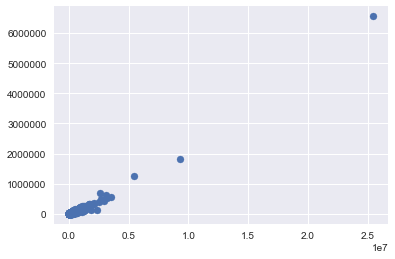

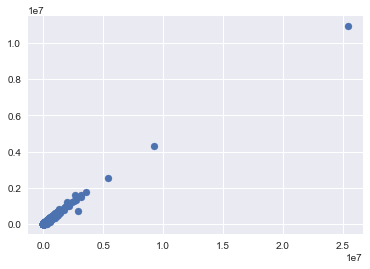

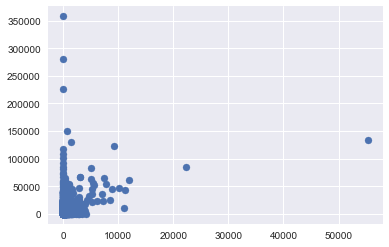

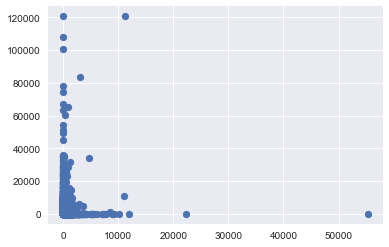

In [34]:
#plot TOTALREV vs Total employee benefit program (Z34)

plt.figure(1)

num_students = data['V33']

totalrev = data['TOTALREV']
emp_benefits = data['Z34']
plt.scatter(totalrev, emp_benefits)


plt.figure(2)
salaries = data['Z32']
plt.scatter(totalrev,salaries)
plt.show()



priv_conts = data['U50']
pupil_support = data['E17']
instr_benefits = data['J13']

# private contributions (U50) vs pupil support (E17)
plt.figure(3)
plt.scatter(priv_conts, pupil_support)

# private contributions vs instruction benefits
plt.figure(4)
plt.scatter(priv_conts, instr_benefits)


In [28]:
data['TOTALREV'].idxmax()

8500

In [33]:
data[data['TOTALREV']==data['TOTALREV'].max()]

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
8500,33,33203100130100,NEW YORK CITY SCHOOL DISTRICT,36061,408,35620,3,3620580,15,995192,...,0,13728019,1312286,569223,14471082,0,0,0,0,0


In [37]:
data[data['V33']==data['V33'].max()]

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
8500,33,33203100130100,NEW YORK CITY SCHOOL DISTRICT,36061,408,35620,3,3620580,15,995192,...,0,13728019,1312286,569223,14471082,0,0,0,0,0
